In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Raji_kabilan\OneDrive\Desktop\infosys\set.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 116 entries, P_NAME to Unnamed: 115
dtypes: float64(96), int64(5), object(15)
memory usage: 3.6+ MB


In [16]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
df[cat_cols].isnull().sum()
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [17]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop(target)


In [18]:
all_nan_cols = [col for col in num_cols if df[col].isna().all()]
all_nan_cols


[]

In [19]:
df.drop(columns=all_nan_cols, inplace=True)


In [20]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('P_HABITABLE')  # protect target


In [21]:
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


In [22]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

for col in num_cols:
    lower = Q1[col] - 1.5 * IQR[col]
    upper = Q3[col] + 1.5 * IQR[col]
    df[col] = np.clip(df[col], lower, upper)


In [23]:
df[target].value_counts()


P_HABITABLE
0    3993
2      34
1      21
Name: count, dtype: int64

In [24]:
df.to_csv("cleaned_data.csv", index=False)


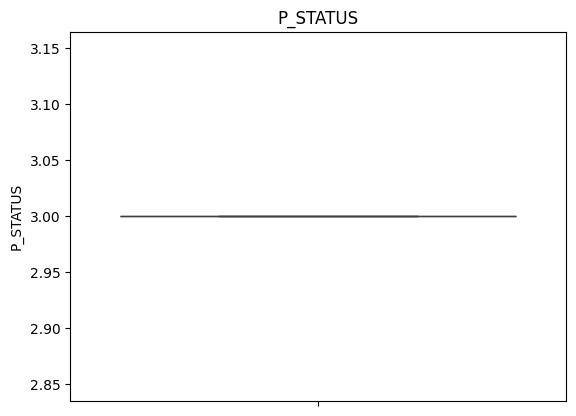

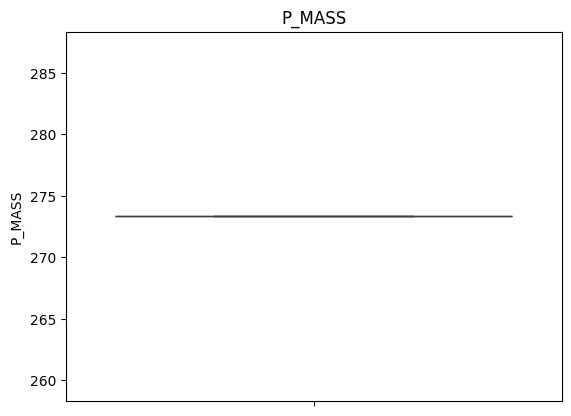

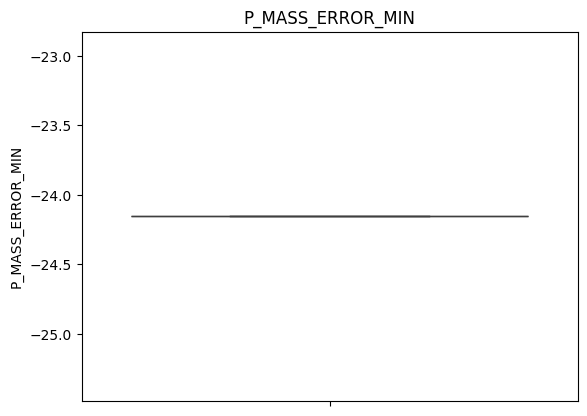

In [25]:
for col in num_cols[:3]:
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.show()


In [26]:
df.isnull().sum()
df.describe()
df.shape


(4048, 15933)

In [27]:
df.to_csv("cleaned_data.csv", index=False)
